# 下载数据

链接: https://pan.baidu.com/s/1L-TAJG55jNCsbVgAYxgV7g 提取码: ciel

课上使用的数据，课件下课给哈~

# 环境部署

```bash
conda create --name myenv python=3.9
```

环境部署是工程师的第一道坎。

## 导入需要用到的包 (环境部署)

In [1]:
print("Versions")
# 数据科学
import pandas as pd
print(f"Pandas: {pd.__version__}")
import numpy as np
print(f"Numpy: {np.__version__}")

# 可视化 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.models import ColorBar, ColumnDataSource
from bokeh.colors import Color

# 优化可视化
sns.set_style('whitegrid')

# 文本可视化工具包
import scattertext as st

# 正则表达式
import re
print(f're: {re.__version__}')

# 预处理
import spacy
print(f'spaCy: {spacy.__version__}')
import nltk
print(f'nltk: {nltk.__version__}')
from spellchecker import SpellChecker
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import casual_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import yaml

# Emoji 分析和语言探索
from spacymoji import Emoji
import spacy_cld
# 对于计数器
from collections import Counter

# 进度条工具包
from tqdm.notebook import tqdm as tqdm
tqdm().pandas()  # Enable tracking of execution progress

Versions
Pandas: 1.0.3
Numpy: 1.18.4
re: 2.2.1
spaCy: 3.7.2
nltk: 3.8.1


0it [00:00, ?it/s]

# 探索分析数据(EDA), 数据整体(Wrangling), and 预处理(Initial Preprocessing)

使用下面数据集：
* Twitter上的客户支持https://www.kaggle.com/thoughtvector/customer-support-on-twitter
  
  
## 数据简述
 Twitter上的客户支持数据集是一个庞大的现代推文和回复语料库，旨在帮助自然语言理解和对话模型的创新，并研究现代客户支持实践和影响。
 
##  上下文
自然语言仍然是我们人类经验中最密集的编码，NLP的创新加速了对这些数据的理解，但推动这一创新的数据集与当今使用的真实语言不匹配。推特上的客户支持数据集提供了大量消费者和推特上客户支持代理之间的现代英语（主要）对话，与其他对话文本数据集相比，它具有三个重要优势：

- 专注-消费者联系客户支持以解决特定问题，需要讨论的问题相对较少，尤其是与reddit语料库等不受约束的对话数据集相比。
- 自然-该数据集中的消费者比Ubuntu对话语料库中的消费者来自更广泛的领域，并且比康奈尔电影对话语料库更自然和最近使用键入文本。
- 简洁——推特的简洁引起了支持代理（而不是照本宣科）更自然的反应，并对问题和解决方案进行了中肯的描述。此外，它还方便地为循环网络提供相对较低的消息限制大小。
    
## 灵感
这个数据集的大小和广度激发了许多有趣的问题：
    
- 我们能预测公司的反应吗？考虑到每家公司处理的一组有限的主题，答案似乎是肯定的！
- 请求会过时吗？与最糟糕的公司相比，最好的公司的反应有多快？
- 我们能为主题聚类学习高质量的密集嵌入或相似性表示吗？
- 语气如何影响客户支持对话？说对不起有帮助吗？
- 我们能帮助公司发现新的问题，或者对客户影响最大的问题吗？

## 内容
数据集是一个CSV，其中每一行都是一条推文。不同的列如下所述。包含的每一个对话都至少有一个来自消费者的请求和一个来自公司的响应。哪些用户ID是公司用户ID可以使用入站字段计算。
    
- tweet_id
    推特的唯一匿名ID。由response_weet_id和in_response_to_weet_id引用。
    
- author_id
    一个唯一的匿名用户ID。数据集中的@s已被替换为其关联的匿名用户标识。

- inbound
    该推文是否为在推特上提供客户支持的公司的“入站”推文。当重新组织数据以训练会话模型时，此功能非常有用。
    
- created_at
    发送推文的日期和时间。
    
- text
    推特内容。电话号码和电子邮件地址等敏感信息将替换为__email__等掩码值。
    
- response_weet_id
    作为对此推文的响应的推文的ID，逗号分隔。
    
- in_response_to_weet_id
    此推文所响应的推文的ID（如果有的话）。

## 数据展示

In [2]:
# 读取所有的数据
all_data = pd.read_csv('data/twitter/twcs.csv')

# 所有数据的shape
print('All data has shape {}'.format(all_data.shape))

# 把列转化成对应的数据类型
all_data['text'] = all_data['text'].astype('string')
all_data['author_id'] = all_data['author_id'].astype('string')

# 这个函数帮助把数据展示添加样式
show = lambda x: x.tail(10).style.set_properties(**{'background-color': 'black',                                                   
                                    'color': 'lawngreen',                       
                                    'border-color': 'white'})\
.applymap(lambda x: f"color: {'lawngreen' if isinstance(x,str) else 'cyan'}")\
.background_gradient(cmap='Blues')

show(all_data)

All data has shape (2811774, 7)


,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
2811764,2987943,AirAsiaSupport,False,Wed Nov 22 07:54:57 +0000 2017,"@823868 Sorry but kindly try to clear browser,cache,cookies and try again. As it should be working just fine. Thanks - Ed",nan,2987944.000000
2811765,2987944,823868,True,Wed Nov 22 07:43:36 +0000 2017,@AirAsiaSupport I am unable to do web checkin. I am getting the below error. Can you please check and revert? Thank you. https://t.co/4V1fT0TH5x,2987943,nan
2811766,139628,ArgosHelpers,False,Wed Nov 22 08:03:26 +0000 2017,@134664 Can you Dm us your order number and we can look into this for you - Georgia,nan,139627.000000
2811767,2987945,VirginTrains,False,Wed Nov 22 08:27:34 +0000 2017,@524544 That's a Peak service. The 09:56 is the first Off-Peak train from Crewe to London Euston ^CB,nan,2987946.000000
2811768,2987946,524544,True,Wed Nov 22 08:25:48 +0000 2017,@VirginTrains Hope you are well? Does the 9.30am train from Crewe to Euston class as peak or off-peak? Thanks,2987945,nan
2811769,2987947,sprintcare,False,Wed Nov 22 08:43:51 +0000 2017,"@823869 Hey, we'd be happy to look into this for you. Please send us a Direct Message, so that we can further assist you. -TN",nan,2987948.000000
2811770,2987948,823869,True,Wed Nov 22 08:35:16 +0000 2017,@115714 wtf!? I’ve been having really shitty service all day !! Get your shit together!,2987947,nan
2811771,2812240,121673,True,Thu Nov 23 04:13:07 +0000 2017,"@143549 @sprintcare You have to go to https://t.co/v2tMHeTL7Q and ask them to add the Hulu service to your account. After you get the text, you’re good to go to https://t.co/gFyUq1kJTK",nan,2812239.000000
2811772,2987949,AldiUK,False,Wed Nov 22 08:31:24 +0000 2017,"@823870 Sounds delicious, Sarah! 😋 https://t.co/7uQPwyH1B6",nan,2987950.000000
2811773,2987950,823870,True,Tue Nov 21 22:01:04 +0000 2017,@AldiUK warm sloe gin mince pies with ice cream - the best thing ever! #notjustxmas#allyearround,"2987951,2987949",nan


##  数据分布
* 从2017年到2018年
* 从另一个，我看到AmazonSupport包含了最多的推文，令人惊讶的是，事实证明，并不是所有的推文都是英文的！

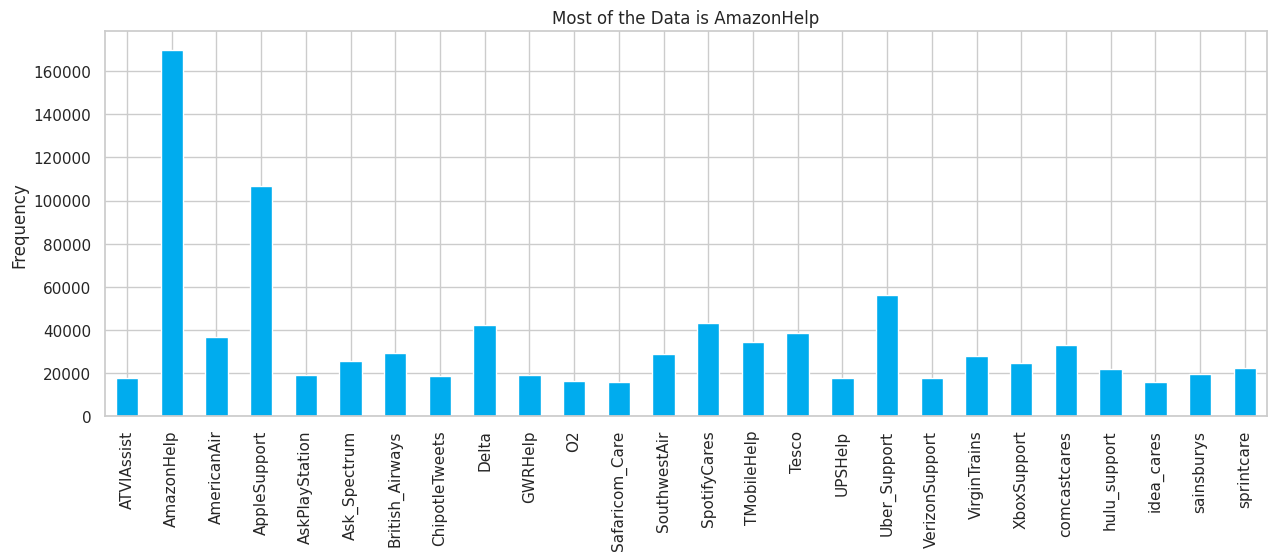

CPU times: user 3.47 s, sys: 160 ms, total: 3.63 s
Wall time: 3.64 s


In [3]:
%%time

# 查看所有作者的分布
count = all_data.groupby("author_id")["text"].count()

# 只展示发威条数大于15000的用户
c = count[count>15000].plot(kind='bar',figsize=(15, 5), color='#00acee')
c.set_xlabel('')
c.set_ylabel('Frequency')
plt.title('Most of the Data is AmazonHelp')

# 保存图片
plt.savefig('visualizations/authors.png')

plt.show()

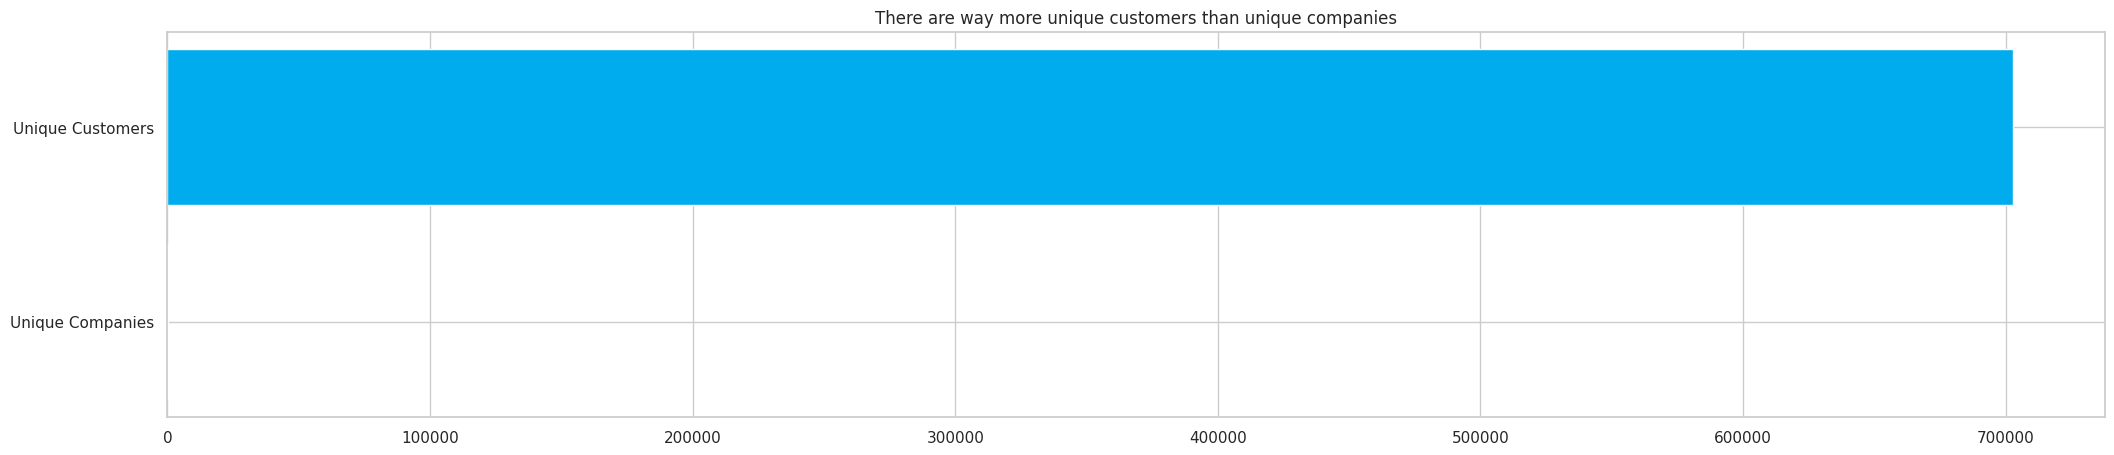

In [4]:
# 有 108 unique authors 是公司用户和 702669个普通用户
authors_count = (len(all_data[all_data.inbound == False].author_id.unique()), len(all_data[all_data.inbound == True].author_id.unique()))

# 可视化
plt.figure(figsize =(25,5))
x = ['Unique Companies','Unique Customers']
ax = plt.barh(x, authors_count, color = '#00acee')
plt.title('There are way more unique customers than unique companies')
plt.show()

## 数据整理(Data Wrangling)

**要求**：
* **入站**：由于我想实现的第一步是意图分类，并弄清楚客户对公司说了什么，所以我只想要从客户到公司的数据（入站数据）。
* **仅苹果数据：**我的第一个建模步骤是进行某种形式的聚类，对每条推文的意图进行分类，如果我将数据缩小到仅苹果数据，这样做可能会更容易，也更富有成效，因为它们将在一个有点相似的域中。我可以将其扩展到其他数据集。
* **第一条推文**
稍后，我希望我的聊天机器人能够对我的客户做出回应。

In [5]:
apple_data = all_data[all_data['author_id'] == 'AppleSupport']
apple_data.shape

(106860, 7)

苹果的数据有106860行，占整个数据的3.8%。这些都是苹果公司给客户的数据，我想要每个苹果客户服务响应的客户给苹果公司的数据，可以在reponse_weet_id中找到。

现在，我删除了响应推特id列的带有NaN值的行，这意味着原始客户查询不可用于该交互。

In [6]:
apple_data.dropna(subset = ['in_response_to_tweet_id'],inplace = True)
apple_data['inbound'].value_counts(), apple_data.shape

/root/miniconda3/envs/myconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(False    106719
 Name: inbound, dtype: int64,
 (106719, 7))

不错，看起来我们还有很多数据要处理（106719行）。

所有这些都是入站数据，因为它是由苹果公司编写的。现在，我想找到客户向Apple Support发送的所有原始推文，并将其作为文本（而不是ID）返回到Dataframe中。

换言之，我将```In_response_to_tweet_id```从其id更改为文本，这样我们就可以看到这条苹果支持推文回答了哪些客户问题。

In [7]:
# 将id转换为整数以匹配用于加入的tweet_id列
apple_data.in_response_to_tweet_id = apple_data.in_response_to_tweet_id.astype('int64')

# 执行内部联接以从all_data中获取相应的tweet并获取响应文本
apple_data = pd.merge(all_data[['tweet_id','text']],apple_data,left_on='tweet_id', right_on='in_response_to_tweet_id')

# 删除不编码有用信息的列，并为实现可理解性而对列进行良好的重命名
apple_data.drop(['tweet_id_x','tweet_id_y','in_response_to_tweet_id','inbound'], axis = 1, inplace = True)

# 重命名列以实现可解释性
apple_data.rename(columns = {'text_x':'inbound_text','text_y':'outbound_text'},inplace = True)

# 入站和出站数据子集
text = apple_data[['inbound_text','outbound_text']]

# 预览
print(text.head())

# 保存真实的原始入站数据
text.to_pickle('objects/raw_text.pkl')

inbound = text['inbound_text']
outbound = text['outbound_text']

# 解包可以帮助我扩展每行的数据以进行检查
# [*text['outbound']]

/root/miniconda3/envs/myconda/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


                                        inbound_text  \
0  @AppleSupport The newest update. I️ made sure ...   
1             @AppleSupport  https://t.co/NV0yucs0lB   
2  @AppleSupport Tried resetting my settings .. r...   
3  @AppleSupport This is what it looks like https...   
4  @AppleSupport I️ have an iPhone 7 Plus and yes...   

                                       outbound_text  
0  @115854 Lets take a closer look into this issu...  
1  @115854 We're here for you. Which version of t...  
2  @115855 Let's go to DM for the next steps. DM ...  
3  @115855 Any steps tried since it started last ...  
4  @115855 That's great it has iOS 11.1 as we can...  


In [8]:
# Showing the results of data wrangling
show(apple_data)

,inbound_text,author_id,created_at,outbound_text,response_tweet_id
106638,"Before installing iOS 11 on my @115858 iPhone, I could get a full day's use without recharging. Now I need to recharge twice a day. What gives?",AppleSupport,Tue Nov 21 22:35:00 +0000 2017,@823684 We know how essential it is to maximize battery life. Let's work together to make sure you get the most out of your battery. What's the iPhone model and exact version of iOS 11 you are running? Can you DM us how long your battery lasts on a full charge? https://t.co/GDrqU2kzhr,nan
106639,Travelled over an hour to @115858 Store to get repairs on a £1000 #iPhoneX only to be told too busy and to come back another day @AppleSupport disgraceful way to treat customers.,AppleSupport,Tue Nov 21 22:33:32 +0000 2017,@823685 We want you to be able to enjoy both your visits to the Apple Store and your new iPhone. Are you seeing issues that we may be able to help with here? We can also help schedule a Genius Bar appointment or look at other service options. Send us a DM to get started. https://t.co/GDrqU2kzhr,nan
106640,"@AppleSupport pretty much all of my photos have just disappeared, why is this? And how do I get them back?",AppleSupport,Wed Nov 22 00:10:37 +0000 2017,@823703 Thanks for reaching out to us. We know how important our photos are and we'll do everything we can to get yours back. Do you use iCloud Photo Library to back your photos up? Join us in DM with more details about when you noticed they were missing. https://t.co/GDrqU2kzhr,nan
106641,What does this mean please @AppleSupport ‘cannot use Thunderbolt accessory’ it has popped up on my MacBookPro whilst at was out,AppleSupport,Wed Nov 22 00:58:00 +0000 2017,@823732 We're happy to look into this with you. Do you have anything plugged in to your Thunderbolt ports when this message pops up? Which version of macOS is currently installed on your MacBook Pro? Let us know in DM. https://t.co/GDrqU22YpT,nan
106642,"@AppleSupport why is my iPhone 7 constantly searching for a signal, and only works if I'm on wifi?",AppleSupport,Wed Nov 22 00:51:00 +0000 2017,"@823733 Let's figure out why this is happening. To start, please DM us with the exact iOS version you're using and the country where you're located. You can find the iOS version by going to Settings > General > About. https://t.co/GDrqU22YpT",nan
106643,"anyone having issues with #osx #HighSierra and #Slack, #zoom or Multiple monitors? Getting major lag. @115858 @118190 @172377 #DevLife",AppleSupport,Wed Nov 22 01:02:29 +0000 2017,"@823737 We're happy to help out with your concerns. To begin, have you made sure that all apps are up-to-date via the App Store > Updates tab? Does the slower performance happen with a specific pattern? Send us a DM and we'll work on this together. https://t.co/GDrqU22YpT",2987500
106644,Hey @AppleSupport - not being able to duplicate a file in #pages when you searched for it is really annoying. What’s the fix?? https://t.co/CqnGyqNsLZ,AppleSupport,Wed Nov 22 02:33:58 +0000 2017,"@689907 We're certainly glad to get you pointed in the right direction! Please reach out in DM and let us know which iPad model you're using and the version of iOS installed, as well as which country you're tweeting from. https://t.co/GDrqU22YpT",nan
106645,Yo @AppleSupport is that weird glitch w/ the capital “I️” your attempt to make my tweets less about me? I️,AppleSupport,Wed Nov 22 02:29:26 +0000 2017,"@823765 We'd love to help! Which device are you using? The latest versions of iOS include a fix for unexpected results with Auto-Correction while typing. If you haven't had a chance, we advise backing up and updating. Here's a guide to help: https://t.co/ahjigcvFRG",nan
106646,What the fuck @AppleSupport my phone keeps hanging up calls and showing “call failure” 🤬😡,AppleSupport,Wed Nov 22 03:27:30 +0000 2017,@823779 We'd like to help. Send us a DM and we can start there. https://t.co/GDrqU22YpT,nan
106647,Is anyone having #iphone issues with there phone fr

现在我们将从这一点开始构建这个“apple_data”。

## 文本预处理Pipeline

在这个过程中，预计我会发现很多边缘案例，而不必全部解决。然而，最终，考虑到这个数据集，我觉得我的预处理管道相对完整。

此外，这是一个迭代的过程，可能你会注意到我的推文仍然有“\u200d”、“#”、“”和“@”，尽管我已经做了很多拟合。这些只是表情符号和额外的标点符号，我在后期决定删除，但最终我只是修改了我的管道功能。

在此之前，我用一袋单词做了一些EDA，看看数据集使用最多的单词是什么，以更好地预处理数据，防止工作粒度过大。

In [9]:
# 编写一个函数来绘制数据中的计数

def top10_bagofwords(data, output_name, title):
    '''将数据作为输入，并根据文本数据中的计数绘制前10个单词'''
    bagofwords = CountVectorizer()
    inbound = bagofwords.fit_transform(data)
    inbound # 输出将是稀疏矩阵
    # 检查经常使用的缩写和口语
    word_counts = np.array(np.sum(inbound, axis=0)).reshape((-1,))
    words = np.array(bagofwords.get_feature_names())
    words_df = pd.DataFrame({"word":words, 
                             "count":word_counts})
    words_rank = words_df.sort_values(by="count", ascending=False)
    # words_rank.to_csv('words_rank.csv') # 将其存储在csv中，以便我可以自己检查和浏览
    words_rank.head()
    # 可视化 top 10 words
    plt.figure(figsize=(12,6))
    sns.barplot(words_rank['word'][:10], words_rank['count'][:10].astype(str), palette = 'inferno')
    plt.title(title)
    
    # Saving
    plt.savefig(f'visualizations/{output_name}.png')
    
    plt.show()

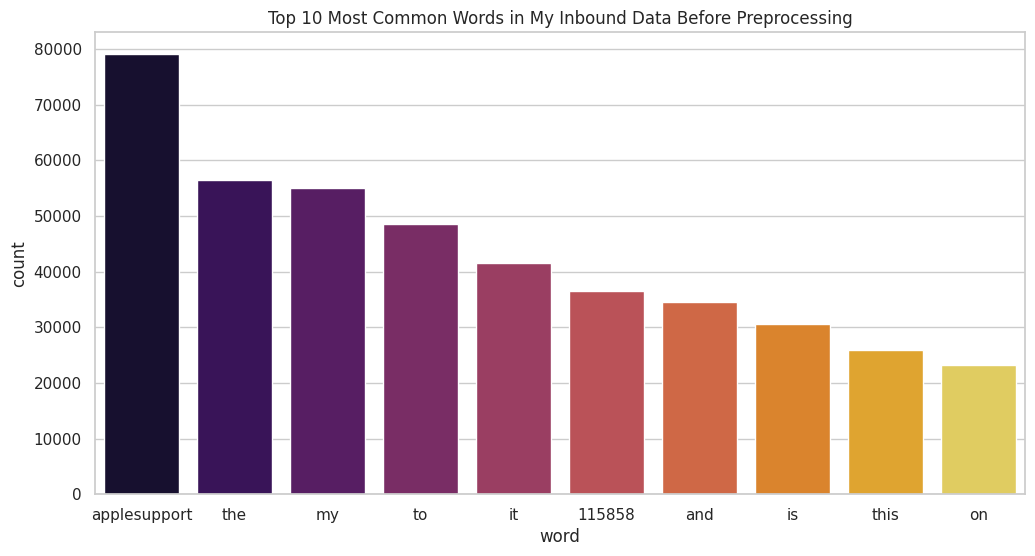

In [10]:
top10_bagofwords(inbound, 'most_common_before' ,'Top 10 Most Common Words in My Inbound Data Before Preprocessing')

我们看到，在预处理之后，我们将删除句柄，这就是上面可视化中的applesupport和115858。现在，我简要地可视化了前10个最常见的令牌，以表明我的数据目前相当脏，如果我不进行预处理，它们肯定会扭曲并破坏我的结果！

## Emoji 分析
您可以将表情符号留在中，并为表情符号嵌入模型学习。表情符号用于非常特殊的情况，如果他们使用表情符号，这将是一个有用的意义。如果表情符号用于内部笑话，那就另当别论了，但这个数据集可能不是这样，因为这些都是客服推文。

实际上有一个嵌入叫做emoji2vec，但这是我可以深入研究的东西。现在，我认为doc2vec无法以最好的方式处理这些表情符号，如果我把它们留在里面，可能会扭曲我的结果。

Extracted from [this kernel](https://www.kaggle.com/psbots/customer-support-meets-spacy-universe)

In [11]:
# import en_core_web_lg
import en_core_web_sm

# This works, I couldn't load the en_core_web_lg
nlp = spacy.load('en_core_web_sm')
emoji = Emoji(nlp, merge_spans=False)
nlp.add_pipe("emoji", first=True)
print(nlp.pipe_names)

# 这是一个存储所有表情符号的列表
# 请确保已准备好您的processed_inbound。我使用了一个中间版本
# 我处理过的数据。或者你可以在运行我的预处理后运行这个下面的管道。

# processed_inbound.progress_apply(" ".join)
emojis = []
for doc in tqdm(nlp.pipe(inbound, batch_size=512)):
    if doc._.has_emoji:
        for e in doc._.emoji:
            emojis.extend(e[0])

# Let's count them
emoji_count = Counter(emojis)
emoji_count.most_common(30)

['emoji', 'tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


0it [00:00, ?it/s]

[('😡', 3069),
 ('️', 1516),
 ('🙄', 1463),
 ('😭', 1100),
 ('\u200d', 1000),
 ('🤔', 959),
 ('😒', 830),
 ('😤', 780),
 ('🤬', 750),
 ('😩', 699),
 ('🏻', 694),
 ('🤦', 622),
 ('🙃', 549),
 ('♀', 537),
 ('🏼', 535),
 ('🏽', 487),
 ('♂', 454),
 ('😑', 438),
 ('😂', 365),
 ('🏾', 337),
 ('🤷', 321),
 ('👎', 315),
 ('👍', 280),
 ('😫', 269),
 ('😐', 261),
 ('😠', 252),
 ('📱', 236),
 ('☹', 226),
 ('🙏', 196),
 ('😔', 194)]

让我们也可视化表情符号，并将其导出为png

In [12]:
from bokeh.io import export_png

# 让我们将其存储在列表中，这样我们就可以将其从上面的管道中删除
unique_emojis = [i[0] for i in emoji_count]

# 同时将计数存储在列表中。跳过不相关的、无法表达的内容。
plotted_emojis = [i[0] for i in emoji_count.most_common(30)]
plotted_emojis = plotted_emojis[:3] + plotted_emojis[5:]
counts = [i[1] for i in emoji_count.most_common(30)]
counts = counts[:3] + counts[5:]

# 使用Bokeh是因为pyplot不显示表情符号
# 运行此单元格以查看html可视化

output_file("visualizations/emojis.html")

参考文档：https://docs.bokeh.org/en/2.4.3/docs/user_guide/export.html

In [ ]:
p = figure(x_range=plotted_emojis, plot_height=600, plot_width = 1300, title="Emoji Counts",
           toolbar_location=None, tools="")
p.vbar(x=plotted_emojis, top=counts, width=0.9, color = "#FBD043")
p.xgrid.grid_line_color = None
p.y_range.start = 0

export_png(p, filename="visualizations/emojis.png")

show(p)

In [ ]:
filename = "visualizations/emojis.html"
IFrame(src=filename, width = 800, height=700)

在这里，我们看到的大多是负面表情符号！这意味着大多数客户的情绪都是抱怨或询问！

现在，我将删除表情符号，但在未来，用这些表情符号做事情可能会很有趣！或者，作为一种选择，我可能只留下最具信息性和最常见的内容，比如前10个明确表达情感的内容——这将与意图有关。

In [14]:
# 停用词
nltk.download('stopwords')
# 标点符号
nltk.download('punkt')
# 词性标记
nltk.download('averaged_perceptron_tagger')
# wordnet
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
# 建立我自己的 tokenizer 

### Variable storage
punct_base = ['?']

# 我要删除的标点符号，包括空标记
puncts = ['\u200d','?', '....','..','...','','@','#', ',', '.', '"', ':', ')', '(', '-', '!', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '*', '+', '\\', 
    '•', '~', '£', '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', 
    '½', 'à', '…', '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', 
    '—', '‹', '─', '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 
    'Ã', '⋅', '‘', '∞', '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', 
    '¹', '≤', '‡', '√', '!','🅰','🅱']

# 使用NLTK的停止词语料库
stopwords.words('english');
stop_words = set(stopwords.words('english')) 

# 找到了一本常用缩写和口语词典
contraction_colloq_dict = {"btw": "by the way", "ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have"}

# 初始化lemmatizer
lemmatizer = nltk.stem.WordNetLemmatizer()

import emoji # For emoji removal step

import en_core_web_sm
try:
    # 正在初始化spaCy对象（不要多次运行）
    nlp_cld = spacy.load('en_core_web_sm')
    language_detector = spacy_cld.LanguageDetector()
    nlp_cld.add_pipe(language_detector)
except ValueError as e:
    print("The spaCy function was run more than once, but that's okay because it means it was initialized!")

The spaCy function was run more than once, but that's okay because it means it was initialized!


## 我的整个初步文本预处理管道

我希望所有的预处理都是一个迭代过程，所以我把它全部编译在一个函数中，这样它就可以同时运行，这样就增强了组织感。在每个预处理步骤中，我都会可视化数据中每个标记的长度。一般来说，像删除停止词这样的事情会将分布向左移动，因为我们在每个预处理步骤中的标记越来越少。我还提供了每个步骤的数据头，以便它清楚地显示每个步骤正在进行的处理。

In [16]:
# 我的预处理功能（在此处定义它们，以便我可以从笔记本的任何位置访问它们）

def visualize_lengths(data,title):
    '''Visualizing lengths of tokens in each tweet'''
    lengths = [len(i) for i in data]
    plt.figure(figsize=(13,6))
    plt.hist(lengths, bins = 40)
    plt.title(title)
    plt.show()
    
def remove_from_list(x, stuff_to_remove) -> list:
        ''' 制作一个从列表中删除项目列表的函数'''
        for item in stuff_to_remove:
            # Making sure to iterate through the entire token
            for i,token in enumerate(x):
                if item == token:
                    del x[i]
        return x
    
def remove_links(doc):
    return [re.sub(r'^https?:\/\/.*[\r\n]*', '', token, flags=re.MULTILINE) for token in doc]

def correct_spellings(x):
    ''' 将列表作为输入，并输出更正拼写的列表'''
    corrected_text = []
    for word in x:
        if word in x:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return corrected_text

def replace_from_dict(x,dic):
    ''' 制作一个函数来替换基于词典的列表中的所有项。我确保使用插入件方法，将较长的gram替换项作为不同项插入该特定索引处的列表中'''
    replaced_counter = 0
    for item in dic.items():
        for i, e in enumerate(x):
            if e == item[0]:
                replaced_counter+=1
                    # Inserting the expanded tokens in a way that preserves the order
                del x[i]
                for ix, token in enumerate(item[1].split()):
                    x.insert(i+ix,token)
#         print(f"Amount of words replaced: {replaced_counter}")
    return x    

def only_english(x):
    ''' 制作一个只接受英语的函数，如果它是英语，则附加True，否则附加False变成mask。返回掩码'''    
    mask = []
    x = x.apply(" ".join)
    try:
        for i,doc in tqdm(enumerate(nlp_cld.pipe(x, batch_size=512))):
            if 'en' not in doc._.languages or len(doc._.languages) != 1:
                mask.append(False)
            else:
                mask.append(True)
    except Exception as e:
        print(f"Exception:{e}")
    return mask

def get_wordnet_pos(word):
    """将POS标记映射到lemmatize（）接受的第一个字符"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)
    
def lemmatize_list(x):
    ''' 此lemmatizer函数应适用于标记化数据的单个列表'''
#         # Turning list into a string
    x = " ".join(x)
    # Returning a list again
    return [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(x)]

def extract_emojis(s):
        return [c for c in s if c not in emoji.UNICODE_EMOJI]

def limit_length(x, max_tokens, min_tokens):
    ''' 输入一个列表并将其从文档中删除，如果文档具有大于最大值和小于最小值'''
    output = x
    if len(x) > max_tokens:
        output = np.nan
    if len(x) <= min_tokens:
        output = np.nan
    return output

def clean_numbers(x):
    for i,j in enumerate(x):
        if bool(re.search(r'\d', j)):
            del x[i]
    return x

def validate(func, locals):
    ''' 验证下面的函数以接受正确的输入'''
    for var, test in func.__annotations__.items():
        value = locals[var]
        try: 
            pr=test.__name__+': '+test.__docstring__
        except AttributeError:
            pr=test.__name__   
        msg = '{}=={}; Test: {}'.format(var, value, pr)
        assert test(value), msg

# End to end tokenizer function

def my_tokenizer(data: lambda _data: isinstance(_data, pd.Series)) -> 'Cleaned Pandas Series':
    ''' 我正在制作自己的端到端标记器函数，用于接受一个Pandas序列作为输入，并输出一个预处理的Pandas系列'''
    
    # 确保输入是一个系列（这是做同一件事的两种方法）
    assert isinstance(data,pd.Series), 'Input must be a Pandas Series'
#     validate(my_tokenizer, locals())
    
    # 1. 将全部转换为小写
    data = data.str.lower()
    
    print(f'1. Original shape of data is {data.shape}')
    
    
    # 2. 使用NLTK的TweetTokenizer进行标记。这将重复字符限制为
    # 三个带有缩小镜头参数，并剥去所有@。它还
    # 将其拆分为1-gram token
    tknzr = TweetTokenizer(strip_handles = True, reduce_len = True)
    # 使用进度应用程序显示进度条
    data = data.progress_apply(tknzr.tokenize)
    
    print(f'2. Tokenized, removed handles, and reduced the length of repeated characters.\
          \n Shape is still {data.shape}. \n \n Peek: \n {data.head()}')
    visualize_lengths(data, 'Length of Tokens after Step 2')
    
    # 3. 删除标点符号
    
    data = data.progress_apply(remove_from_list, stuff_to_remove = puncts)
    print(f'3. Removed empty tokens and punctuation. Shape is still {data.shape}. \n \n Peek: \n {data.head()}')
    visualize_lengths(data, 'Length of Tokens after Step 9')
    
    # 3.1. 正在删除链接
    
    data = data.progress_apply(remove_links)
    
    print(f'3. Removed the links. Shape is still {data.shape}. \n \n Peek: \n {data.head()}')
    visualize_lengths(data, 'Length of Tokens after Step 3')

    # 4. 检查并更正拼写错误
    spell = SpellChecker()
    
    # 先跳过此步骤，因为它花费的时间太长
#     data = data.progress_apply(correct_spellings)
    
    print(f'4. Applied automispelling corrections. Shape is still {data.shape}. \n \n Peek: \n {data.head()}')
    
    
    # 5. 使用上面定义的相同remove_from_list函数删除停止字
    
    data = data.progress_apply(remove_from_list, stuff_to_remove = stop_words)
    
    print(f'5. Removed the stop words. Shape is still {data.shape}. \n \n Peek: \n {data.head()}')
    visualize_lengths(data, 'Length of Tokens after Step 4')
    
    # 6. 扩展收缩和口语
    
    data = data.progress_apply(replace_from_dict, dic = contraction_colloq_dict)
    print(f'6. Expanded contractions into extra tokens. Shape is still {data.shape}. \n \n Peek: \n {data.head()}')
    visualize_lengths(data, 'Length of Tokens after Step 5')
    
    # 7. 使用spaCy删除非英语推文

    data = data[only_english(data)]
    print(f'7. Remove all non-english Tweets. Shape is now {data.shape}. Clearly less than before! \n \n Peek: \n {data.head()}')
    
    # 8. Lemmatization

    data = data.progress_apply(lemmatize_list)
    print(f'8. Lemmatized the tokens. Shape is still {data.shape}. \n \n Peek: \n {data.head()}')
    visualize_lengths(data, 'Length of Tokens after Step 8')   
   
    # 再次移除以确保我得到所有东西
    data = data.progress_apply(remove_from_list, stuff_to_remove = puncts)

    # 9.1. 删除表情符号--（更新）以保留系列索引的方式
    
    unique_emojis = [i[0] for i in emoji.UNICODE_EMOJI]
    data = data.apply(remove_from_list, stuff_to_remove = unique_emojis)
    
    # 9.2. 删除数字--（UPDATE）也以保留系列索引的方式
    # 使用嵌套列表理解
    data = data.progress_apply(clean_numbers)
    
    print(f'9. Removed emojis and numbers. Shape is still {data.shape}. \n \n Peek: \n {data.head()}')
    visualize_lengths(data, 'Length of Tokens after Step 9')   
    
    # 10. 推文的限制长度
    max_tokens = 50
    min_tokens = 5
    data = data.progress_apply(limit_length, min_tokens = min_tokens, max_tokens = max_tokens)
    # 删除所有nan值，这些值是不符合阈值要求的令牌限制
    data = data.dropna()
    print(f'10. Limited each tweet to a max of {max_tokens} tokens and a min of {min_tokens} tokens. Shape is now {data.shape}. \n \n Peek: \n {data.head()}')
    visualize_lengths(data, 'Length of Tokens after Step 10')
    
    return data
    

1. Original shape of data is (106648,)


  0%|          | 0/106648 [00:00<?, ?it/s]

2. Tokenized, removed handles, and reduced the length of repeated characters.          
 Shape is still (106648,). 
 
 Peek: 
 0    [the, newest, update, ., i️, made, sure, to, d...
1                            [https://t.co/nv0yucs0lb]
2    [tried, resetting, my, settings, .., restartin...
3    [this, is, what, it, looks, like, https://t.co...
4    [i️, have, an, iphone, 7, plus, and, yes, i️, do]
Name: inbound_text, dtype: object


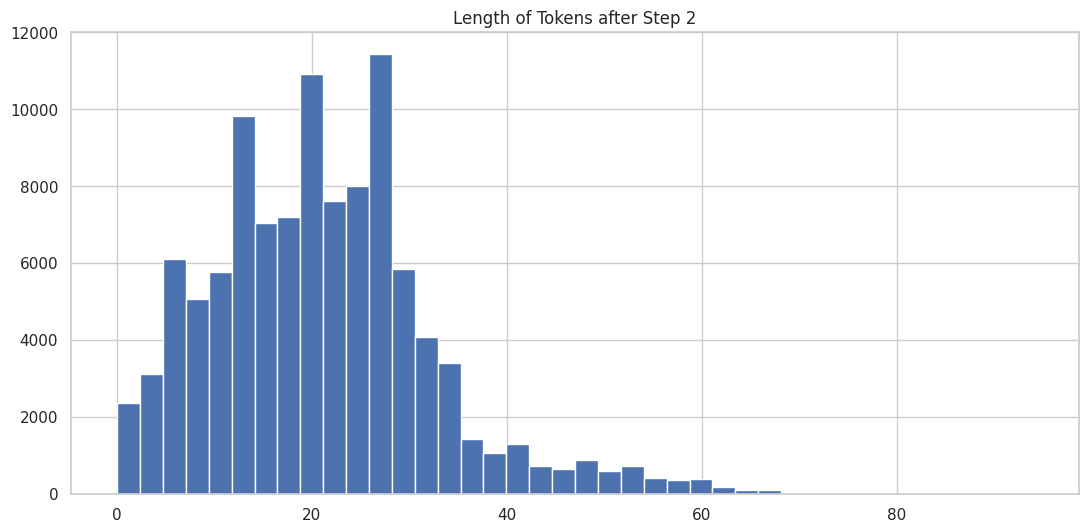

  0%|          | 0/106648 [00:00<?, ?it/s]

3. Removed empty tokens and punctuation. Shape is still (106648,). 
 
 Peek: 
 0    [the, newest, update, i️, made, sure, to, down...
1                            [https://t.co/nv0yucs0lb]
2    [tried, resetting, my, settings, restarting, m...
3    [this, is, what, it, looks, like, https://t.co...
4    [i️, have, an, iphone, 7, plus, and, yes, i️, do]
Name: inbound_text, dtype: object


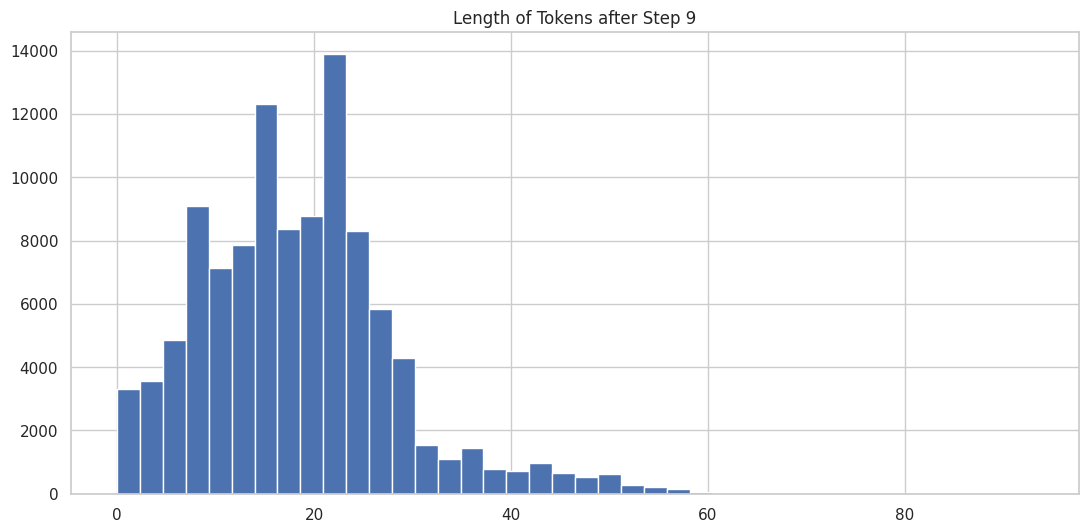

  0%|          | 0/106648 [00:00<?, ?it/s]

3. Removed the links. Shape is still (106648,). 
 
 Peek: 
 0    [the, newest, update, i️, made, sure, to, down...
1                                                   []
2    [tried, resetting, my, settings, restarting, m...
3                  [this, is, what, it, looks, like, ]
4    [i️, have, an, iphone, 7, plus, and, yes, i️, do]
Name: inbound_text, dtype: object


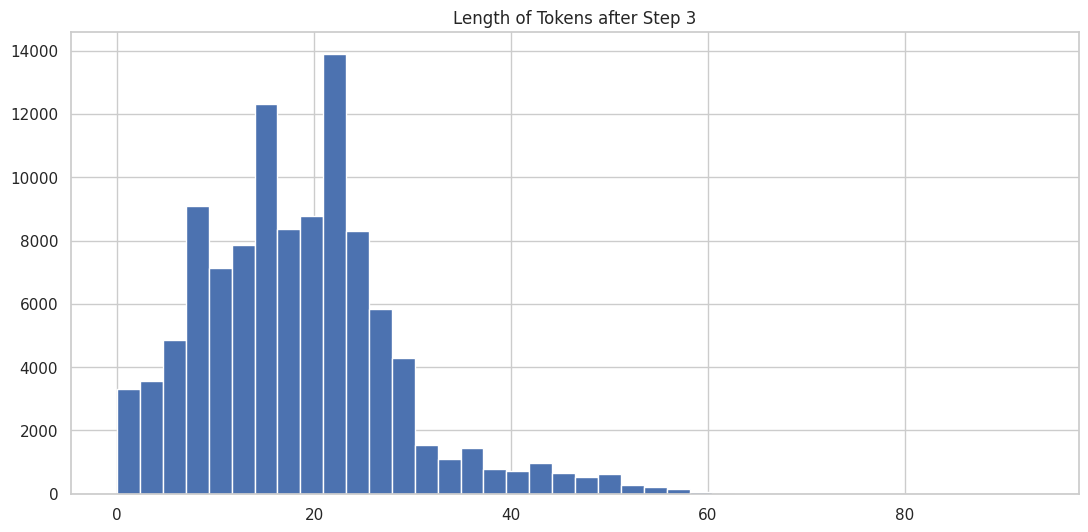

4. Applied automispelling corrections. Shape is still (106648,). 
 
 Peek: 
 0    [the, newest, update, i️, made, sure, to, down...
1                                                   []
2    [tried, resetting, my, settings, restarting, m...
3                  [this, is, what, it, looks, like, ]
4    [i️, have, an, iphone, 7, plus, and, yes, i️, do]
Name: inbound_text, dtype: object


  0%|          | 0/106648 [00:00<?, ?it/s]

5. Removed the stop words. Shape is still (106648,). 
 
 Peek: 
 0    [newest, update, i️, made, sure, download, yes...
1                                                   []
2      [tried, resetting, settings, restarting, phone]
3                                      [looks, like, ]
4                       [i️, iphone, 7, plus, yes, i️]
Name: inbound_text, dtype: object


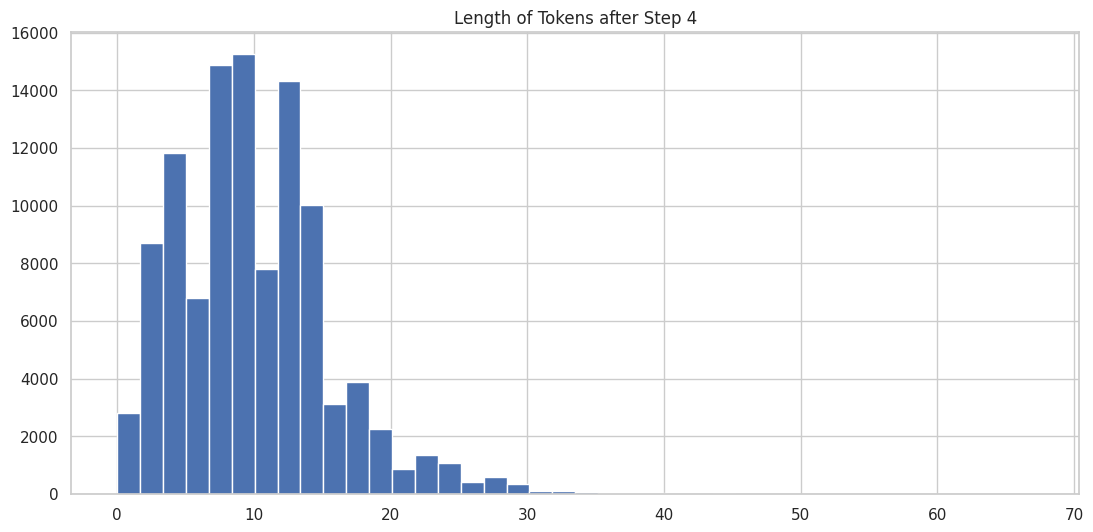

  0%|          | 0/106648 [00:00<?, ?it/s]

6. Expanded contractions into extra tokens. Shape is still (106648,). 
 
 Peek: 
 0    [newest, update, i️, made, sure, download, yes...
1                                                   []
2      [tried, resetting, settings, restarting, phone]
3                                      [looks, like, ]
4                       [i️, iphone, 7, plus, yes, i️]
Name: inbound_text, dtype: object


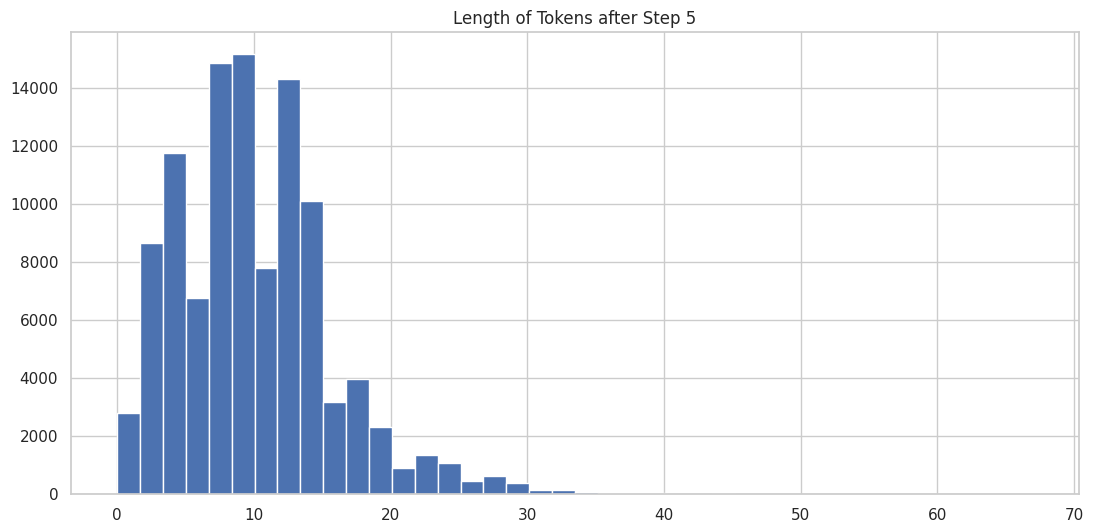

0it [00:00, ?it/s]

7. Remove all non-english Tweets. Shape is now (93397,). Clearly less than before! 
 
 Peek: 
 0    [newest, update, i️, made, sure, download, yes...
2      [tried, resetting, settings, restarting, phone]
4                       [i️, iphone, 7, plus, yes, i️]
5                     [i️, need, answers, annoying, 🙃]
6    [hey, anyone, else, upgraded, ios, 11.1, issue...
Name: inbound_text, dtype: object


  0%|          | 0/93397 [00:00<?, ?it/s]

8. Lemmatized the tokens. Shape is still (93397,). 
 
 Peek: 
 0    [new, update, i️, make, sure, download, yester...
2                [try, reset, setting, restart, phone]
4                       [i️, iphone, 7, plus, yes, i️]
5                         [i️, need, answer, annoy, 🙃]
6    [hey, anyone, else, upgraded, io, 11.1, issue,...
Name: inbound_text, dtype: object


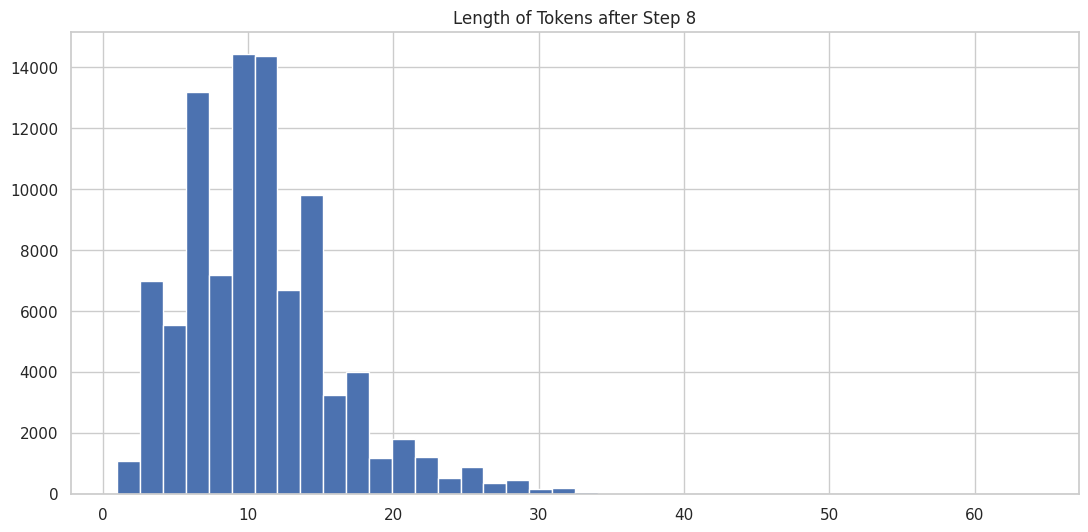

  0%|          | 0/93397 [00:00<?, ?it/s]

  0%|          | 0/93397 [00:00<?, ?it/s]

9. Removed emojis and numbers. Shape is still (93397,). 
 
 Peek: 
 0    [new, update, i️, make, sure, download, yester...
2                [try, reset, setting, restart, phone]
4                          [i️, iphone, plus, yes, i️]
5                         [i️, need, answer, annoy, 🙃]
6    [hey, anyone, else, upgraded, io, issue, capit...
Name: inbound_text, dtype: object


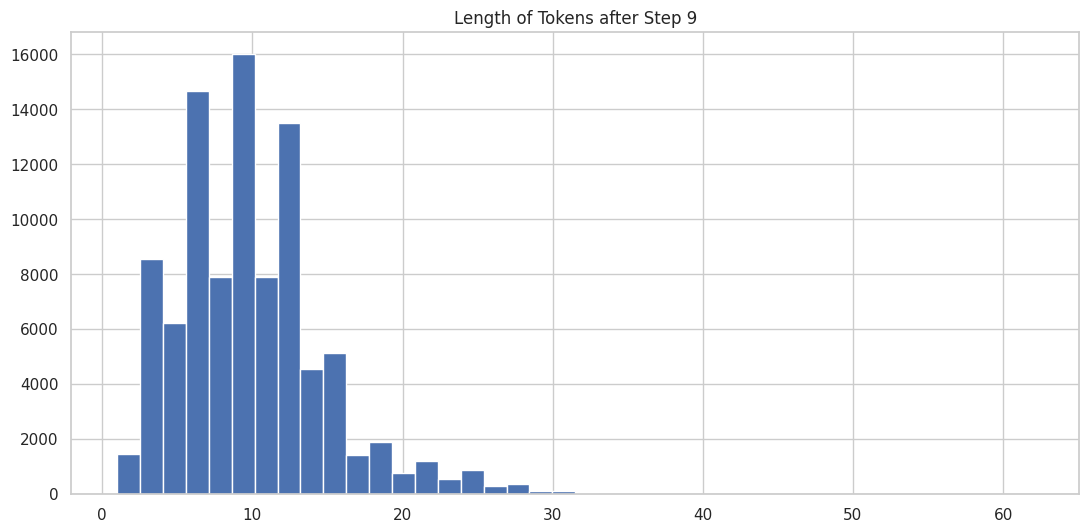

  0%|          | 0/93397 [00:00<?, ?it/s]

10. Limited each tweet to a max of 50 tokens and a min of 5 tokens. Shape is now (77175,). 
 
 Peek: 
 0     [new, update, i️, make, sure, download, yester...
6     [hey, anyone, else, upgraded, io, issue, capit...
12    [hello, internet, someone, explain, symbol, ke...
13    [get, screenshot, say, iphonex, reserve, email...
15    [thank, update, phone, even, slow, barely, wor...
Name: inbound_text, dtype: object


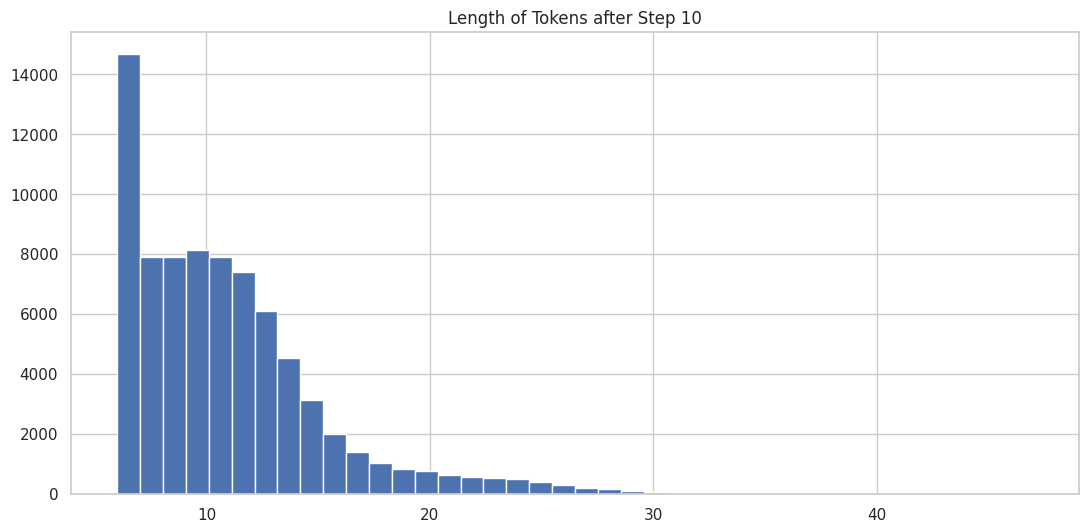

In [17]:
processed_inbound = my_tokenizer(text['inbound_text'])

这太棒了，我们现在将预处理的数据存储到变量“processed_inbound”中。现在，让我们将处理后的数据转换为pkl，这样我就不必一遍又一遍地运行它来在下一个笔记本上使用。

In [18]:
processed_inbound.head()

0     [new, update, i️, make, sure, download, yester...
6     [hey, anyone, else, upgraded, io, issue, capit...
12    [hello, internet, someone, explain, symbol, ke...
13    [get, screenshot, say, iphonex, reserve, email...
15    [thank, update, phone, even, slow, barely, wor...
Name: inbound_text, dtype: object

In [19]:
# Index matching
real_inbound = text['inbound_text'].loc[processed_inbound.index]
real_outbound = text['outbound_text'].loc[processed_inbound.index]
processed_inbound

# Storing in DataFrame
processed = pd.DataFrame({'Processed Inbound': processed_inbound, 'Real Inbound': real_inbound,
             'Real Outbound': real_outbound})

# Preview
processed.head()

,Processed Inbound,Real Inbound,Real Outbound
0,"[new, update, i️, make, sure, download, yester...",@AppleSupport The newest update. I️ made sure ...,@115854 Lets take a closer look into this issu...
6,"[hey, anyone, else, upgraded, io, issue, capit...",Hey @AppleSupport and anyone else who upgraded...,"@115856 Hey, let's work together to figure out..."
12,"[hello, internet, someone, explain, symbol, ke...","Hello, internet. Can someone explain why this ...",@115861 You're in the right place; we'll do al...
13,"[get, screenshot, say, iphonex, reserve, email...",@AppleSupport I’ve got a screenshot saying my ...,@115863 Go ahead and send us a DM please. Let ...
15,"[thank, update, phone, even, slow, barely, wor...",Thank you @AppleSupport I updated my phone and...,"@115864 We'd like to help, but we'll need more..."


In [20]:
# Saving processed inbound data into a serialized saved file
processed_inbound.to_pickle('objects/processed_inbound.pkl')

# 保存所有的预处理数据
processed.to_pickle('objects/processed.pkl')

In [63]:
# 重新加载
processed_inbound = pd.read_pickle('objects/processed_inbound.pkl')
processed_inbound.head()

0     [new, update, i️, make, sure, download, yester...
6     [hey, anyone, else, upgraded, io, issue, capit...
12    [hello, internet, someone, explain, symbol, ke...
13    [get, screenshot, say, iphonex, reserve, email...
15    [thank, update, phone, even, slow, barely, wor...
Name: inbound_text, dtype: object

In [22]:
# 只是为了好看的展示
show = lambda x: x.head(5).style.set_properties(**{'background-color': 'black',                                                   
                                    'color': 'lawngreen',                       
                                    'border-color': 'white'})\
.applymap(lambda x: f"color: {'cyan' if isinstance(x,str) else 'lawngreen'}")\
.background_gradient(cmap='Blues')

# 正在读取已处理的入站
processed_inbound = pd.read_pickle('objects/processed_inbound_extra.pkl')


# 显示已处理的文本
display = pd.DataFrame({"Inbound": inbound, "Processed Inbound": 
                        list(processed_inbound) + [''] * (len(inbound) - len(processed_inbound)),
                       "Outbound": outbound})

show(display)

,Inbound,Processed Inbound,Outbound
0,@AppleSupport The newest update. I️ made sure to download it yesterday.,new update i️ make sure download yesterday,@115854 Lets take a closer look into this issue. Select the following link to join us in a DM and we'll go from there. https://t.co/GDrqU22YpT
1,@AppleSupport https://t.co/NV0yucs0lB,hey anyone else upgraded io issue capital i️ mail app put,@115854 We're here for you. Which version of the iOS are you running? Check from Settings > General > About.
2,@AppleSupport Tried resetting my settings .. restarting my phone .. all that,hello internet someone explain symbol keep appear phone i️ try type letter i️ also,@115855 Let's go to DM for the next steps. DM us here: https://t.co/GDrqU22YpT
3,@AppleSupport This is what it looks like https://t.co/XCQU2l4xUB,get screenshot say iphonex reserve email say happen,@115855 Any steps tried since it started last night?
4,@AppleSupport I️ have an iPhone 7 Plus and yes I️ do,thank update phone even slow barely work thank ruin phone,@115855 That's great it has iOS 11.1 as we can rule out being outdated. Any steps tried since this started? Do you recall when it started?


# 作业

思考还有哪些是可以做的：
- EDA
- Preprocessing

--- 

可以使用的EDA方法
* 使用词云观察词频
* 使用聚类方法查看主题
* ...


可以使用的预处理方法
- Removal of Frequent words
- Removal of Rare words
- Stemming
- Lemmatization
- 移除情绪词、敏感词等
- Conversion of emoticons to words
- Conversion of emojis to words
- Removal of HTML tags
- Chat words conversion
- ...



## 预处理管道的单元测试，并简要说明

在这里，我分别测试了上面的每个预处理步骤，并评论了我在每个步骤中所做的一些考虑。在本节的最后，我还简要地展示了我在预处理数据时考虑的其他一些事情。

### 1. 移除数字

我还想确保我的去掉11.1，因为那只是噪音。

In [23]:
'1'.isdigit()

True

In [24]:
processed_inbound

0            new update i️ make sure download yesterday
6     hey anyone else upgraded io issue capital i️ m...
12    hello internet someone explain symbol keep app...
13    get screenshot say iphonex reserve email say h...
15    thank update phone even slow barely work thank...
                            ...                        
1                                password account login
2                               credit card payment pay
3                                        update upgrade
4                                      info information
5                          nearest apple location store
Length: 76072, dtype: object

In [25]:
test = ['1', 'i', 'dont', 'want', 'numbers', '12', '44','11.1']

no_ints = [x for x in test if not any(c.isdigit() for c in x)]

no_ints

['i', 'dont', 'want', 'numbers']

In [26]:
# Nested list comprehensions to apply it to the entire series
# [[x for x in i if not any(c.isdigit() for c in x)] for i in processed_inbound]

### 2. 测试TweetTokenizer

In [27]:
test = " ".join(['@KingJames','I','am', 'the', '#GOAT'])

In [30]:
tknzr = TweetTokenizer(strip_handles = True, reduce_len = True)
# Using progress apply to show the progress bar
tknzr.tokenize(test)

['I', 'am', 'the', '#GOAT']

所以现在我知道这个标记器不会去掉#，所以我会添加它

### 3. 从列表中删除内容

In [31]:
test = ['', 'bye', 'empty', 'string']

In [32]:
def remove_from_list(x, stuff_to_remove):
    ''' 制作一个从列表中删除项目列表的函数'''
    for item in stuff_to_remove:
        # 确保遍历每个token
        for i,token in enumerate(x):
            if item == token:
                del x[i]
    return x

In [33]:
remove_from_list(test, puncts)

['bye', 'empty', 'string']

### 3.1 正在删除链接
将使用正则表达式来执行此操作。

In [37]:
test = processed_inbound[0:10]
test;

In [38]:
def remove_links(doc):
    return [re.sub(r'^https?:\/\/.*[\r\n]*', '', token, flags=re.MULTILINE) for token in doc]

In [40]:
test.apply(remove_links);
test

0            new update i️ make sure download yesterday
6     hey anyone else upgraded io issue capital i️ m...
12    hello internet someone explain symbol keep app...
13    get screenshot say iphonex reserve email say h...
15    thank update phone even slow barely work thank...
19    need software update urgently battery last lit...
21                 hi go youtube lose do thanks support
25    hey last time download update freak phone give...
26                       find option get it always play
27             app still longer able control lockscreen
dtype: object

### 4. 测试拼写检查器

In [41]:
test = ['Cna','you', 'twy', 'to', 'spel', 'check','and','fux', 'tihs','ios']

spell = SpellChecker()
def correct_spellings(x):
    ''' Takes as input a list and outputs a list of the corrected spelling'''
    corrected_text = []
    for word in x:
        if word in x:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return corrected_text
        
text = "speling correctin"
correct_spellings(test)

['can', 'you', 'two', 'to', 'spell', 'check', 'and', 'fun', 'this', 'is']

因此，我们在这里看到，这个函数通常做得很好，但它错误地将twy作为try，将fux作为fix进行了更正，因为它不理解上下文，并使用Levianathon距离作为拼写错误单词的度量，但这没关系，通常我认为它作为预处理步骤会做得很不错。但它太慢了。

### 6. 测试收缩和口语语言扩展步骤

In [43]:
def replace_from_dict(x,dic):
    ''' 制作一个函数来替换基于词典的列表中的所有项。我确保使用插入件方法，将较长的gram替换项作为不同项插入该特定索引处的列表中'''
    x = x.str.lower() 
    x = list(x)
    replaced_counter = 0
    for item in dic.items():
        for i, e in enumerate(x):
            if e == item[0]:
                replaced_counter+=1
                # Inserting the expanded tokens in a way that preserves the order
                del x[i]
                for ix, token in enumerate(item[1].split()):
                    x.insert(i+ix,token)
    print(f"Amount of words replaced: {replaced_counter}")
    return pd.Series(x)

trial = pd.Series(["Ain't","nobody","is","as", "cute", "as", "you"])
replace_from_dict(trial,contraction_colloq_dict)

Amount of words replaced: 1


0        is
1       not
2    nobody
3        is
4        as
5      cute
6        as
7       you
dtype: object

### 7. 测试删除非英语推文
我将在spaCy宇宙中使用一个名为spaCy-CLD的扩展，它使用Naive Bayes和n-gram作为语言分类器。这很酷。还好我只需要把它装成一个包裹就可以了！我认为它也比我之前尝试的语言检测模块更高效，我花了2个多小时才将其应用于我的数据！我很喜欢他们为优化所做的工作。

spaCy中的扩展属性允许您存储与应用程序相关的附加信息。这是一个非常强大的工具。

Todo:看看langdetector是用什么训练的。

In [44]:
# I will assume that I already initialized the spaCy objects, as shown in the code cell up top

In [45]:
def only_english(x):
    ''' Making a function that only accepts English by appending True if it is English and False otherwise 
        into a mask. Returns a mask'''    
    mask = []
    x = x.apply(" ".join)
    try:
        for i,doc in tqdm(enumerate(nlp_cld.pipe(x, batch_size=512))):
            if 'en' not in doc._.languages or len(doc._.languages) != 1:
                mask.append(False)
            else:
                mask.append(True)
    except Exception as e:
        print(f"Exception:{e}")
    return mask

In [48]:
# 演示和实验什么是文档对象
doc = nlp_cld('new update i️ make sure download yesterday')
print(doc)
print(doc._.languages)  
print(doc._.language_scores)

new update i️ make sure download yesterday
['en']
{'en': 0.97}


### 8. 测试WordNetLemmatizer

下面的引理器试图将这个词分解为引理或字典形式。

In [50]:
# 初始化spacy‘en’模型，只保留引理所需的tagger组件
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

sentence = "James is good, but Eko beats him at coding Python so is he really?"

# 使用加载的'en'模型对象`nlp分析句子`
doc = nlp(sentence)

# Extract the lemma for each token and join
[token.lemma_ for token in doc]
#> 'the strip bat be hang on -PRON- foot for good'

['James',
 'be',
 'good',
 ',',
 'but',
 'Eko',
 'beat',
 'he',
 'at',
 'code',
 'Python',
 'so',
 'be',
 'he',
 'really',
 '?']

In [51]:
# Lemmatize with POS Tag

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [52]:
# This function returns the POS
get_wordnet_pos('cool')

'n'

In [53]:
# 1. Init Lemmatizer
lemmatizer = WordNetLemmatizer()

# 2. Lemmatize Single Word with the appropriate POS tag
word = 'feet'
print(lemmatizer.lemmatize(word, get_wordnet_pos(word)))

# 3. Lemmatize a Sentence with the appropriate POS tag
sentence = "James is good at coding python, but Eko is even better at coding"
print([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(sentence)])

foot
['James', 'be', 'good', 'at', 'cod', 'python', ',', 'but', 'Eko', 'be', 'even', 'well', 'at', 'cod']


In [54]:
lemmatizer = nltk.stem.WordNetLemmatizer()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

test = ['This','is','a','row']

def lemmatize_text(x):
    ''' This lemmatizer f`unction should work on a single list of tokenized data'''
    # Turning list into a string
    x = " ".join(x)
    # Returning a list again
    return [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(x)]

未能掌握动词的过去时。

In [55]:
trial = processed_inbound.iloc[1:10]
trial

6     hey anyone else upgraded io issue capital i️ m...
12    hello internet someone explain symbol keep app...
13    get screenshot say iphonex reserve email say h...
15    thank update phone even slow barely work thank...
19    need software update urgently battery last lit...
21                 hi go youtube lose do thanks support
25    hey last time download update freak phone give...
26                       find option get it always play
27             app still longer able control lockscreen
dtype: object

In [56]:
trial.progress_apply(lemmatize_text)

  0%|          | 0/9 [00:00<?, ?it/s]

6     [h, e, y, a, n, y, o, n, e, e, l, s, e, u, p, ...
12    [h, e, l, l, o, i, n, t, e, r, n, e, t, s, o, ...
13    [g, e, t, s, c, r, e, e, n, s, h, o, t, s, a, ...
15    [t, h, a, n, k, u, p, d, a, t, e, p, h, o, n, ...
19    [n, e, e, d, s, o, f, t, w, a, r, e, u, p, d, ...
21    [h, i, g, o, y, o, u, t, u, b, e, l, o, s, e, ...
25    [h, e, y, l, a, s, t, t, i, m, e, d, o, w, n, ...
26    [f, i, n, d, o, p, t, i, o, n, g, e, t, i, t, ...
27    [a, p, p, s, t, i, l, l, l, o, n, g, e, r, a, ...
dtype: object

iOS仍然是错误的，但这没关系，因为iOS的所有实例仍然会在一起。

### 9. Removing Emojis

In [57]:
test = pd.Series([['😤', '🙍','🎲', '🙃', 'get', 'rid', 'of', '😐','emojis'],['This', 'No','Emoji']], index = [6,9])
test

6    [😤, 🙍, 🎲, 🙃, get, rid, of, 😐, emojis]
9                        [This, No, Emoji]
dtype: object

In [58]:
# Redefining
def remove_from_list(x, stuff_to_remove):
    ''' Making a function to remove a list of items from a list'''
    for item in stuff_to_remove:
        # Making sure to iterate through the entire token
        for i,token in enumerate(x):
            if item == token:
                del x[i]
    return x

In [59]:
import emoji

def extract_emojis(s):
    return [c for c in s if c in emoji.UNICODE_EMOJI]

In [60]:
unique_emojis = [i[0] for i in emoji.UNICODE_EMOJI]
test.apply(remove_from_list, stuff_to_remove = unique_emojis)

6    [😤, 🙍, 🎲, 🙃, get, rid, of, 😐, emojis]
9                        [This, No, Emoji]
dtype: object

### 10. 限制每条推文的长度
根据我们在上面每一步看到的代币分布，我认为一个好的截止点是50个代币。我将尝试75或100这样的东西，因为你通常不想丢弃太多数据。如果你不删除数据，当你使用Keras标记器和pad序列时，如果它超过100个单词，它就会停止。

类似地，我想筛选出具有小于特定阈值的令牌数量的文档。

In [61]:
# Creating toy list of length 100
test = ['test'] * 100
test = pd.Series([test, ['Another','one']])
test

0    [test, test, test, test, test, test, test, tes...
1                                       [Another, one]
dtype: object

In [62]:
def limit_length(x, max_tokens, min_tokens):
    ''' Inputs a list and drops it out of the document if 
    it has more than the max and less than the min'''
    output = x
    if len(x) > max_tokens:
        output = np.nan
    if len(x) < thres:
        output = np.nan
    return output

## 可以替代的步骤
Ones that I did not include in my Pipeline for a specific reason, but I still employed or considered.

### 2. 使用正则表达式清除数字

In [ ]:
test = pd.Series([['1','iPhone','is','2','little'],['help','1','please']])

In [ ]:
def clean_numbers(x):
    for i,j in enumerate(x):
        if bool(re.search(r'\d', j)):
            del x[i]
    return x

In [ ]:
test = test.apply(clean_numbers)
test

In [ ]:
test

### 3. N Grams
Pairs are always better usually.

# 其他可以探索的数据

These are just the two other datasets that I explored. I did not use the Ubuntu one because I did not like the language that the customer's spoke here and I don't think it is not ideal to merge it with by my Twitter Apple inbound data.

As for the RSICS data, it's interesting because it also had some data that encodes some relational information of the customer (I ultimately want my chatbot to have a relational aspect to it as well, so it is not a bland chatbot), but I am not interested in travel and plane customer data so I did not use this.

## Ubuntu

In [ ]:
!ls data/ubuntu

In [ ]:
# Reading in Ubuntu data
ubuntu_df = pd.read_csv('data/ubuntu/dialogueText.csv')

In [ ]:
# Visualizing the tables, applying styling so that the table is more readable
show = lambda x: x.tail(50).style.set_properties(**{'background-color': 'black',                                                   
                                    'color': 'lawngreen',                       
                                    'border-color': 'white'})\
.applymap(lambda x: f"color: {'lawngreen' if isinstance(x,str) else 'red'}")\
.background_gradient(cmap='Blues')

In [ ]:
show(ubuntu_df)

In [ ]:
ubuntu_df.info()

In [ ]:
# Getting just the text
text = pd.Series(ubuntu_df['text']).astype(str)
text

In [ ]:
# End to end tokenizer function

def ubuntu_tokenizer(data: lambda _data: isinstance(_data, pd.Series)) -> 'Cleaned Pandas Series':
    ''' I am making my own end-to-end tokenizer function for preprocessing that accepts
    a Pandas Series as input and outputs a preprocessed Pandas Series'''
    
    # Making sure input is a series (these are two ways of doing the same thing)
    assert isinstance(data,pd.Series), 'Input must be a Pandas Series'
    
    # 1. Converting all to lower case
    data = data.str.lower()
    
    print(f'1. Original shape of data is {data.shape}')
    
    
    # 2. Tokenizing with NLTK's TweetTokenizer. This limits repeated characters to 
    # three with the reduce lens paramater and strips all the @'s. It also
    # splits it into 1-gram tokens
    tknzr = TweetTokenizer(strip_handles = True, reduce_len = True)
    # Using progress apply to show the progress bar
    data = data.progress_apply(tknzr.tokenize)
    
    print(f'2. Tokenized, removed handles, and reduced the length of repeated characters.\
          \n Shape is still {data.shape}. \n \n Peek: \n {data.head()}')
    visualize_lengths(data, 'Length of Tokens after Step 2')
    
    # 3. Removing the punctuation
    
    data = data.progress_apply(remove_from_list, stuff_to_remove = puncts)
    print(f'3. Removed empty tokens and punctuation. Shape is still {data.shape}. \n \n Peek: \n {data.head()}')
    visualize_lengths(data, 'Length of Tokens after Step 9')
    
    # 3.1. Removing links
    
    data = data.progress_apply(remove_links)
    
    print(f'3. Removed the links. Shape is still {data.shape}. \n \n Peek: \n {data.head()}')
    visualize_lengths(data, 'Length of Tokens after Step 3')

    # 4. Checking for and correcting mispellings
    spell = SpellChecker()
    
    # Skipping this step first because it takes way too long
#     data = data.progress_apply(correct_spellings)
    
    print(f'4. Applied automispelling corrections. Shape is still {data.shape}. \n \n Peek: \n {data.head()}')
    
    # 5. Removing the stop words, utilizing the same remove_from_list function defined above
    
    data = data.progress_apply(remove_from_list, stuff_to_remove = stop_words)
    
    print(f'5. Removed the stop words. Shape is still {data.shape}. \n \n Peek: \n {data.head()}')
    visualize_lengths(data, 'Length of Tokens after Step 4')
    
    # 6. Expanding contractions and colloquial language
    
    data = data.progress_apply(replace_from_dict, dic = contraction_colloq_dict)
    print(f'6. Expanded contractions into extra tokens. Shape is still {data.shape}. \n \n Peek: \n {data.head()}')
    visualize_lengths(data, 'Length of Tokens after Step 6')

def ubuntu_tokenizer_2(data: lambda _data: isinstance(_data, pd.Series)):
    
    # 7. Removing non-english Tweets with spaCy

    data = data[only_english(data)]
    print(f'7. Remove all non-english Tweets. Shape is now {data.shape}. Clearly less than before! \n \n Peek: \n {data.head()}')
    
    # 8. Lemmatization

    data = data.progress_apply(lemmatize_list)
    print(f'8. Lemmatized the tokens. Shape is still {data.shape}. \n \n Peek: \n {data.head()}')
    visualize_lengths(data, 'Length of Tokens after Step 8')   
   
    # Removing again to make sure I get everything
    data = data.progress_apply(remove_from_list, stuff_to_remove = puncts)

    # 9.1. Removing emojis -- (UPDATE) in a way that preserves Series indexes
    
    unique_emojis = [i[0] for i in emoji.UNICODE_EMOJI]
    data = data.apply(remove_from_list, stuff_to_remove = unique_emojis)
    
    # 9.2. Removing numbers -- (UPDATE) also in a way that preserves Series indexes
    # Using nested list comprehension
    data = data.progress_apply(clean_numbers)
    
    print(f'9. Removed emojis and numbers. Shape is still {data.shape}. \n \n Peek: \n {data.head()}')
    visualize_lengths(data, 'Length of Tokens after Step 9')   
    
    # 10. Limiting length of Tweet
    max_tokens = 50
    min_tokens = 5
    data = data.progress_apply(limit_length, min_tokens = min_tokens, max_tokens = max_tokens)
    # Dropping all nan values, which are the token limits that didn't meet the thresholding requirements
    data = data.dropna()
    print(f'10. Limited each tweet to a max of {max_tokens} tokens and a min of {min_tokens} tokens. Shape is now {data.shape}. \n \n Peek: \n {data.head()}')
    visualize_lengths(data, 'Length of Tokens after Step 10')
    
    return data

In [ ]:
# Applying first part of preprocessing pipeline
ubuntu_tokenizer(text)

In [ ]:
dir()

This is a better place to get intents like gratitude or goodbye.

## Relational Services in Customer Service (RSICS)

In [ ]:
pd.read_csv('data/rsics_dataset/1_2_align.csv')